# Final Project (Capstone Project)

## The Financial Analyst Challenge: Analyze and advice on a Client´s portfolio

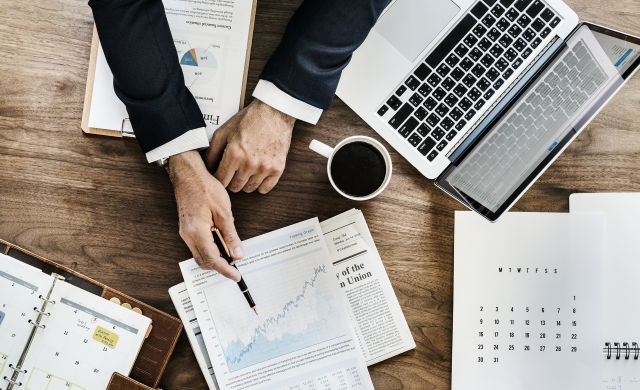

## Welcome to the Final Project!

This challenge requires you to __apply__ and __combine__ many concepts and methods that you have learned in this course.

This scenario could be a real-world case in the life of a Financial Analyst / Advisor. It requires a combination of <br>
- solid __coding skills__, <br><br>
- some __background knowledge in Finance/Investment__ (all you need to know is teached in the course)
and, even more important <br><br>
   
- the ability to __interpret__ and __understand__ the __underlying data and the client´s requests__ and the ability to __incorporate the Client´s inputs__ into your analysis <br> <br>
__Combining Expertise / hard Skills with case-specific Judgement__ -> requires some practise but also some talent. 

### The Case

It´s your first day as Financial Analyst in an Asset Management Firm that manages the Portfolios of High Net Worth Individuals (HNWI). <br><br>
Your Boss recently solicited a new Client, Mary Johnson, 65 years old. Mary recently retired after 30 Years as an independent physician. Her husband died soon and bequeathed a considerable Investment Portfolio to her. <br><br>
From 1997 until today she has been solely invested into __5 Health Care Stocks__, that are today the __most valuable__ Health Care Stocks in the US Market in terms of __Market Capitalization__. She strongly believes that it´s best to only invest into sectors where she has specific industry expertise (Health Care). She only trusts the largest and best-known companies in the market. Her Strategy has been pretty simple: Buying an __equal number of shares__ of each Stock and __reinvesting all dividends__ (assume no costs and taxes). <br> <br> 
Now that she has retired with no active work income (she needs to live from her Investment Portfolio), Mary decided to make her portfolio more suitable to the new situation. In a very first step, she agreed with your boss to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality Corporate Bonds.   <br> <br>
Now, as a next second step, it´s your task to guide her into a __more diversified Stock Portfolio that better reflects Modern Portfolio Theory__.   

---------------------------------------------------------------------

### Now it´s your Turn!

__Step 1: Identify the five stocks and get the respective Stock Tickers__! (use the __listings_clean.csv__ file)

----------------------------------

__Step 2: Create an appropriate Index from 1997 (hint: start with 1996-12-31) until the end of 2018 that best reflects her strategy and create a normalized Price Chart (with Base Value 100 on 1996-12-31)!__ 
Hint: Use Yahoo Finance! <br> 
(At a first glance: Do you think her Portfolio performed well?)

----------------------------------

Mary did not closely monitor her Portfolio in the past. She is a very self-confident, if not overconfident person. Therefore, you suspect that she overestimates her portfolio´s past performance.

__Step 3: Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!"__ Is she right? 

----------------------------------

Once you have analyzed and educated Mary on the past Performance of her Portfolio, your task is to compare her Portfolio with similar designed Portfolios/Indexes of other Sectors (five largest companies). Your colleagues already prepared appropriate indexes for other sectors (sector_indexes.csv). 

__Step 4: Analyze and compare the performance of Mary´s Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Mary with an interactive normalized Price Chart where she can play around__! <br>
Hint: Import and use the csv-file "__sector_indexes.csv__"

----------------------------

__Step 5: Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare!__  Hint: Assume a risk-free Return of 1.3% p.a. <br>
(In terms of Sharpe Ratio, how did Mary´s Portfolio perform compared to the other Indexes?)

----------------------------------

The results of Step 5 support Mary´s belief that the Health Care Sector is the one and only Sector to be invested in: "Even if the Consumer Services- Sector showed a better Sharpe Ratio and a higher Return than Health Care, the Risk is simply too high!" And there is no benefit to add other Sectors with lower Sharpe Ratio than Health Care - this will not improve the Sharpe Ratio of my portfolio! Therefore, I will stick to my current Stock Portfolio!". Your argument __"Past Performance is no Guarantee / no Indicator of future Results"__ did not impress her much.

__Step 6:  Show Mary that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!__

Hint: Simulate 50,000 random Portfolios (use np.random.seed(111)!) and show the best Portfolio as well as a visual summary of your analysis. 

----------------------------------

Congrats! With your analysis, Mary agrees to diversify her Stock Portfolio by adding other Sectors! However, she still does not agree with "Past Performance is no Guarantee / no Indicator of future Results" and "The most valuable Stocks might also be the most overvalued Stocks". Given that Mary is not an easy person and given her considerable Wealth compared to her Lifestyle, you agree with your Boss that you (and Mary´s Portfolio) can live with the results of this first advisory round. Together with Mary, you make the following plan: __Adding those sectors__ to her Stock Portfolio that
- Showed a __positive Alpha__ over the most recent 4-Year Period
- Have a __Beta-Factor below 1__ (non-cyclical / defensive) as Mary expects/fears some Market Turmoil in the near Future. 

__Step 7: Identify Sectors with positive Alpha and a Beta-Factor < 1. Which Sectors will be added to Mary´s Portfolio?__

Hint: Use the S&P 500 Total Return Index as Market Portfolio (SP500_TR.csv).

# STOP HERE, IF YOU WANT TO DO THE CHALLENGE ON YOUR OWN!

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Some Guidance and Hints

### Step 1: Identify the five stocks and get the respective Stock Tickers!

Hint: Identify the __five largest stocks__ in the __Sector "Health Care"__ in terms of __Market Capitalization__! <br>
__Save__ the respective __Stock Tickers/Symbols__ in a list!

In [ ]:
# run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cufflinks as cf

plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# run the cell!
listings = pd.read_csv("listings_clean.csv", index_col = "Symbol")

In [ ]:
# run the cell!
listings.head()

In [ ]:
# run the cell!
listings.tail()

In [ ]:
health = listings.loc[listings.Sector == "Health Care"].copy()

In [ ]:
large_cap_hea = health.nlargest(n = 5, columns = "Market_Cap")

In [ ]:
large_cap_hea

In [ ]:
ticker = large_cap_hea.index.to_list()

In [ ]:
ticker

### Step 2: Create an appropriate Index from 1997 (start with 1996-12-31) until the end of 2018 that best reflects her strategy and create a normalized Price Chart (with Base Value 100 on 1996-12-31)!

(At a first glance: Do you think Mary´s Portfolio performed well?)

Hint: Download and import historical prices from Yahoo Finance. Create a Price-weighted Total Return Index! (You need Close Prices and Adjusted Close Prices!) 

In [ ]:
start = "1997-01-01"
end = "2018-12-31"

In [ ]:
stocks = yf.download(ticker, start= start, end = end )[["Adj Close", "Close"]]

In [ ]:
stocks

In [ ]:
weights = stocks.Close.div(stocks.Close.sum(axis = 1), axis = "index")

In [ ]:
weights

In [ ]:
ret = stocks["Adj Close"].pct_change().dropna()

In [ ]:
hea_index = ret.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [ ]:
hea_index

In [ ]:
hea_index[pd.to_datetime("1996-12-31")] = 100

In [ ]:
hea_index

In [ ]:
hea_index.sort_index(inplace = True)

In [ ]:
hea_index.name = "Health Care"

In [ ]:
hea_index

In [ ]:
hea_index.plot(figsize = (12, 8))
plt.show()

That looks really terrific! Her initial Investment increased eightfold in 22 Years.  

### Step 3: Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!" Is she right? 

Hint: Create a Return Triangle with annual log Returns.

In [ ]:
# old
# annual = hea_index.resample("A", kind = "period").last().to_frame()
# annual

In [ ]:
# new
annual = hea_index.resample("YE").last().to_frame().to_period()
annual

In [ ]:
annual.columns = ["Price"]

In [ ]:
annual["Return"] = np.log(annual.Price / annual.Price.shift())

In [ ]:
annual.dropna(inplace = True)

In [ ]:
annual

In [ ]:
years = annual.index.size
years

In [ ]:
windows = [year for year in range(years, 0, -1)]
windows

In [ ]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [ ]:
annual

In [ ]:
triangle = annual.drop(columns = ["Price", "Return"])

In [ ]:
triangle

In [ ]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

Mary is not right. Her Portfolio even lost value in the nine-year Period from 2001 until 2009!

### Step 4: Analyze and compare the performance of her Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Mary with an interactive normalized Price Chart where she can play around!

Hint: Import and use the csv-file "sector_indexes.csv". Use an interactive Plotly Chart!

In [ ]:
hea_index

In [ ]:
indexes = pd.read_csv("sector_indexes.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
indexes.head()

In [ ]:
indexes["Health_Care"] = hea_index

In [ ]:
indexes.head()

In [ ]:
indexes.Health_Care = indexes.Health_Care.div(indexes.Health_Care.iloc[0]).mul(100)

In [ ]:
indexes.head()

In [ ]:
indexes.info()

In [ ]:
import cufflinks as cf

In [ ]:
indexes.iplot()

### Step 5: Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare! 

(In terms of Sharpe Ratio, how did Mary´s Portfolio perform compared to the other Indexes?)

Hint: Assume a risk-free Return of 1.3% p.a.

In [ ]:
indexes.head()

In [ ]:
ret = indexes.pct_change().dropna()

In [ ]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [ ]:
summary = ann_risk_return(ret)

In [ ]:
summary

In [ ]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
rf = [0.013, 0]
rf

In [ ]:
summary["Sharpe"] = (summary.Return - rf[0]) / summary.Risk

In [ ]:
summary.sort_values("Sharpe", ascending = False)

The Large-Cap Health Sector showed the second highest Sharpe Ratio!

###  Step 6:  Show Mary that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!

Hint: Simulate 50,000 random Portfolios (use np.random.seed(111)!) and show the best Portfolio as well as a visual summary of your analysis. 

In [ ]:
ret.head()

In [ ]:
noa = len(ret.columns)
noa

In [ ]:
nop = 50000

In [ ]:
np.random.seed(111)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights

In [ ]:
weights

In [ ]:
port_ret = ret.dot(weights.T)

In [ ]:
port_ret.head()

In [ ]:
port_summary = ann_risk_return(port_ret)

In [ ]:
port_summary

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
port_summary["Sharpe"] = (port_summary.Return - rf[0]) / port_summary.Risk

In [ ]:
port_summary

In [ ]:
port_summary.describe()

In [ ]:
msrp = port_summary.Sharpe.idxmax()
msrp

In [ ]:
msrp_p = port_summary.iloc[msrp]
msrp_p

In [ ]:
summary

In [ ]:
msrp_w = weights[msrp, :]
msrp_w

In [ ]:
pd.Series(index = indexes.columns, data = msrp_w)

Congrats! You could manage to convince Mary to diversify her Stock Portfolio!

### Step 7: Identify Sectors with positive Alpha and a Beta-Factor < 1. Which Sectors will be added to Mary´s Portfolio?

Hint: Use the S&P 500 Total Return Index as Market Portfolio (SP500_TR.csv). Calculate the following Metrics for the Sector Indexes and the Market Portfolio:
- Annualized Risk and Return (daily simple Returns)
- Sharpe Ratio
- Annualized Total Risk in Variance units
- Systematic Risk
- Unsystematic Risk
- Beta
- CAPM Return
- Alpha

In [ ]:
ret.head()

In [ ]:
indexes.head()

In [ ]:
SP500 = pd.read_csv("SP500_TR.csv", parse_dates = ["Date"], index_col = "Date")["Close"]

In [ ]:
SP500 = SP500.reindex(indexes.index)

In [ ]:
ret_SP = SP500.pct_change().dropna()

In [ ]:
ret_SP.head()

In [ ]:
ret["SP500"] = ret_SP

In [ ]:
ret

In [ ]:
summary = ann_risk_return(ret)

In [ ]:
summary

In [ ]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [ ]:
COV = ret.cov()*252

In [ ]:
COV

In [ ]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [ ]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [ ]:
summary

In [ ]:
summary["beta"] = summary.SystRisk_var / summary.loc["SP500", "SystRisk_var"]

In [ ]:
summary["capm_ret"] = rf[0] + (summary.loc["SP500", "Return"] - rf[0]) * summary.beta

In [ ]:
summary["alpha"] = summary.Return - summary.capm_ret

In [ ]:
summary

In [ ]:
summary.loc[(summary.alpha > 0) & (summary.beta < 1)]

You will add the Sectors Basic Industries, Consumer Durables and Public Utilities to Mary´s Health Care Portfolio.

# Well Done! 